In [ ]:
# Assignment 1 : Simulation of Bertrand's Paradox
# Name : Nevish Pathe
# Roll No. : 220757

# Assignment 1

## Simulation of Bertrand's Paradox

### Problem Statement

Consider a circle with a chord drawn inside it. The problem is to determine the probability that a randomly chosen chord is longer than the side of an inscribed equilateral triangle.

### Paradox
The paradox arises due to different interpretations of how chords are randomly chosen:

1. If chords are selected by randomly choosing two points on the circumference of the circle, the probability is $1/3$.
2. If the chords are selected by drawing lines perpendicular to randomly chosen points on a randomly chosen radius, the probability is $1/4$
3. If chords are selected by randomly choosing a point within the circle and then drawing a chord perpendicular to the radius passing through that point, the probability is $1/2$.


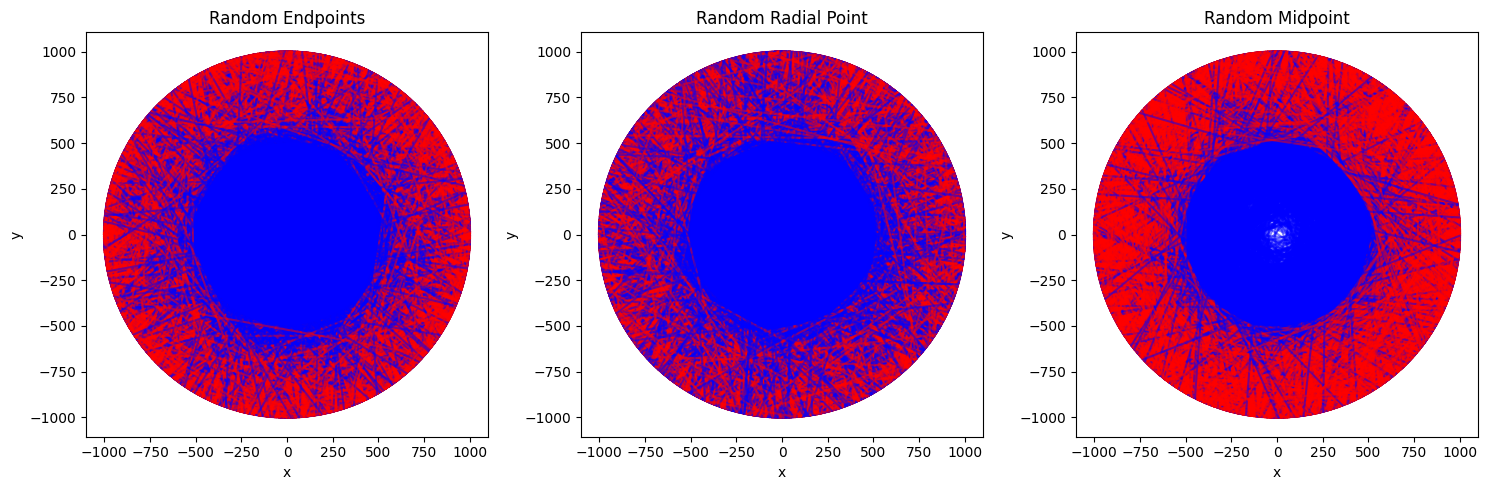

Probabilities for the different cases : 0.3348 (Random Endpoints), 0.5003 (Random Radial Point, 0.2498 (Random Midpoint))


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

radius = 1000
theta = np.linspace(0, 2*np.pi, 100)
x_circle = radius * np.cos(theta)
y_circle = radius * np.sin(theta)

def get_random_point_inside_circle(radius):
    while True:
        x = np.random.uniform(-radius, radius)
        y = np.random.uniform(-radius, radius)
        if x**2 + y**2 <= radius**2:
            return x, y, np.sqrt(x**2 + y**2)

num_samples = 10000

def plot_chords(ax, x, y, title, threshold):
    ax.plot(x_circle, y_circle, 'b-')
    ax.set_title(title)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.axis('equal')
    ctr = 0
    for i in range(len(x)):
        length = np.sqrt((x[i][1] - x[i][0])**2 + (y[i][1] - y[i][0])**2)
        if length > threshold:
            ax.plot(x[i], y[i], color='blue', alpha=0.5)  # Highlight chords longer than threshold in blue
            ctr += 1
        else:
            ax.plot(x[i], y[i], color='red', alpha=0.5)
    return (ctr/num_samples)

# Case 1 (Random Endpoints): Choosing two random points on circumference
chords_case1_x = []
chords_case1_y = []
for _ in range(num_samples):
    theta1 = np.random.uniform(0, 2*np.pi)
    theta2 = np.random.uniform(0, 2*np.pi)
    x1, y1 = radius * np.cos(theta1), radius * np.sin(theta1)
    x2, y2 = radius * np.cos(theta2), radius * np.sin(theta2)
    chords_case1_x.append([x1, x2])
    chords_case1_y.append([y1, y2])

# Case 2 (Random Radial Point): Choosing a random point on a random radius, and drawing a chord perpendicular to it at that point
chords_case2_x = []
chords_case2_y = []
for _ in range(num_samples):
    r = np.random.uniform(0, radius)
    theta1 = np.random.uniform(0, 2*np.pi)
    x1, y1 = r * np.cos(theta1), r * np.sin(theta1)
    theta0 = np.arccos(r/radius)

    theta2 = theta1 + theta0
    if theta2 > 2 * np.pi:
        theta2 -= 2 * np.pi

    theta3 = theta1 - theta0
    if theta3 < 0:
        theta3 += 2 * np.pi

    x2, y2 = radius * np.cos(theta2), radius * np.sin(theta2)
    x3, y3 = radius * np.cos(theta3), radius * np.sin(theta3)
    chords_case2_x.append([x2, x3])
    chords_case2_y.append([y2, y3])

# Case 3 (Random Midpoint) : Choosing a random point inside circle and then drawing a chord through it perpendicular to radius passing through that point
chords_case3_x = []
chords_case3_y = []
for _ in range(num_samples):
    x, y, r = get_random_point_inside_circle(radius)
    theta = angle = np.arctan2(y, x)

    theta0 = np.arccos(r/radius)
    theta2 = theta + theta0
    if theta2 > 2 * np.pi:
        theta2 -= 2 * np.pi

    theta3 = theta - theta0
    if theta3 < 0:
        theta3 += 2 * np.pi

    x2, y2 = radius * np.cos(theta2), radius * np.sin(theta2)
    x3, y3 = radius * np.cos(theta3), radius * np.sin(theta3)
    chords_case3_x.append([x2, x3])
    chords_case3_y.append([y2, y3])

threshold = np.sqrt(3) * radius

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

t1 = 'Random Endpoints'
t2 = 'Random Radial Point'
t3 = 'Random Midpoint'

p1 = plot_chords(axs[0], chords_case1_x, chords_case1_y, t1, threshold)
p2 = plot_chords(axs[1], chords_case2_x, chords_case2_y, t2, threshold)
p3 = plot_chords(axs[2], chords_case3_x, chords_case3_y, t3, threshold)

plt.tight_layout()
plt.show()

print(f"Probabilities for the different cases : {p1} ({t1}), {p2} ({t2}, {p3} ({t3}))")

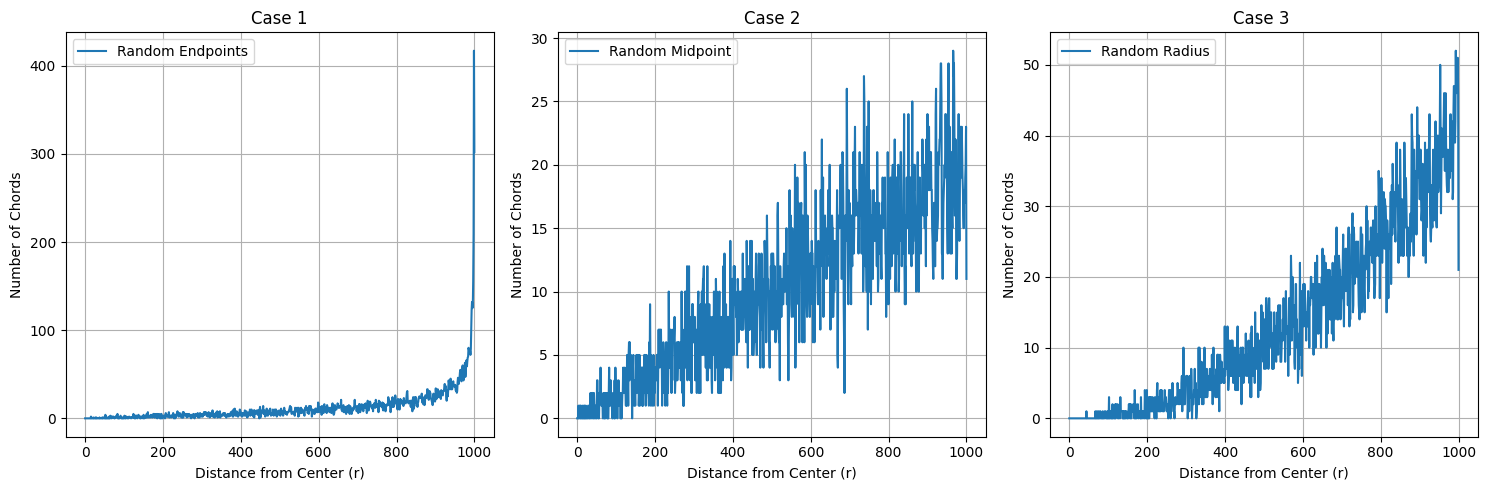

In [ ]:
def count_chords_at_distance_r(chords_x, chords_y, r):
    count = 0
    # print(r)
    for i in range(len(chords_x)):
        midpoint_x = (chords_x[i][0] + chords_x[i][1]) / 2
        midpoint_y = (chords_y[i][0] + chords_y[i][1]) / 2
        distance_midpoint_to_center = np.sqrt(midpoint_x**2 + midpoint_y**2)

        if abs(distance_midpoint_to_center - r) < r/1000:
            count += 1
    return count

r_values = np.linspace(0, radius, 1000)

counts_case1 = [count_chords_at_distance_r(chords_case1_x, chords_case1_y, r) for r in r_values]
counts_case2 = [count_chords_at_distance_r(chords_case2_x, chords_case2_y, r) for r in r_values]
counts_case3 = [count_chords_at_distance_r(chords_case3_x, chords_case3_y, r) for r in r_values]

plt.figure(figsize=(15, 5))

# Plot for Case 1
plt.subplot(1, 3, 1)
plt.plot(r_values, counts_case1, label='Random Endpoints')
# plt.ylim(0, 20)
plt.xlabel('Distance from Center (r)')
plt.ylabel('Number of Chords')
plt.title('Case 1')
plt.legend()
plt.grid(True)

# Plot for Case 2
plt.subplot(1, 3, 2)
plt.plot(r_values, counts_case2, label='Random Midpoint')
# plt.ylim(0, 20)
plt.xlabel('Distance from Center (r)')
plt.ylabel('Number of Chords')
plt.title('Case 2')
plt.legend()
plt.grid(True)

# Plot for Case 3
plt.subplot(1, 3, 3)
plt.plot(r_values, counts_case3, label='Random Radius')
# plt.ylim(0, 20)
plt.xlabel('Distance from Center (r)')
plt.ylabel('Number of Chords')
plt.title('Case 3 ')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()